In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


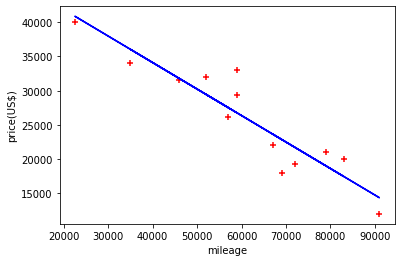

In [35]:
plt.xlabel('mileage')
plt.ylabel('price(US$)')
plt.scatter(df['Mileage'], df['Sell Price($)'], color='red', marker='+')
reg = linear_model.LinearRegression()
reg.fit(df[['Mileage']], df['Sell Price($)'])
plt.plot(df['Mileage'], reg.predict(df[['Mileage']]), color='blue')

In [36]:
dm = pd.get_dummies(df['Car Model'])
dm

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [7]:
c = pd.concat([df, dm], axis='columns')
c

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [29]:
pr = c.drop(['Car Model', 'Mercedez Benz C class'], axis='columns')
#dummy variable trap

In [30]:
x = pr.drop('Sell Price($)', axis='columns')
x

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [31]:
y = c['Sell Price($)']

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x, y)

LinearRegression()

In [33]:
model.predict([[45000, 4, 0, 0]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [34]:
model.predict([[86000,7,0,1]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])